In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load datasets
movies = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings_small.csv')
keywords = pd.read_csv('keywords.csv')

In [4]:
# Display basic info
print(movies.info())
print(ratings.info())
print(keywords.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
# Handle missing values if any
movies.dropna(subset=['title'], inplace=True)  # Drop rows where title is missing
ratings.dropna(subset=['rating'], inplace=True)  # Drop rows where rating is missing
keywords.dropna(subset=['keywords'], inplace=True)  # Drop rows where keywords are missing

In [6]:
# Convert column names to lowercase for consistency
movies.columns = [col.lower() for col in movies.columns]
ratings.columns = [col.lower() for col in ratings.columns]
keywords.columns = [col.lower() for col in keywords.columns]

In [7]:
# Display the first few rows of the datasets
print(movies.head())
print(ratings.head())
print(keywords.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [8]:
# Basic statistics
print(ratings.describe())

              userid        movieid         rating     timestamp
count  100004.000000  100004.000000  100004.000000  1.000040e+05
mean      347.011310   12548.664363       3.543608  1.129639e+09
std       195.163838   26369.198969       1.058064  1.916858e+08
min         1.000000       1.000000       0.500000  7.896520e+08
25%       182.000000    1028.000000       3.000000  9.658478e+08
50%       367.000000    2406.500000       4.000000  1.110422e+09
75%       520.000000    5418.000000       4.000000  1.296192e+09
max       671.000000  163949.000000       5.000000  1.476641e+09


In [9]:
# Clean movie_id column
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
ratings = ratings[ratings['movieid'].isin(movies['id'])]



In [10]:
# Merge datasets for further analysis
movies_keywords = pd.merge(movies, keywords, left_on='id', right_on='id')

Distribution of Movie Ratings


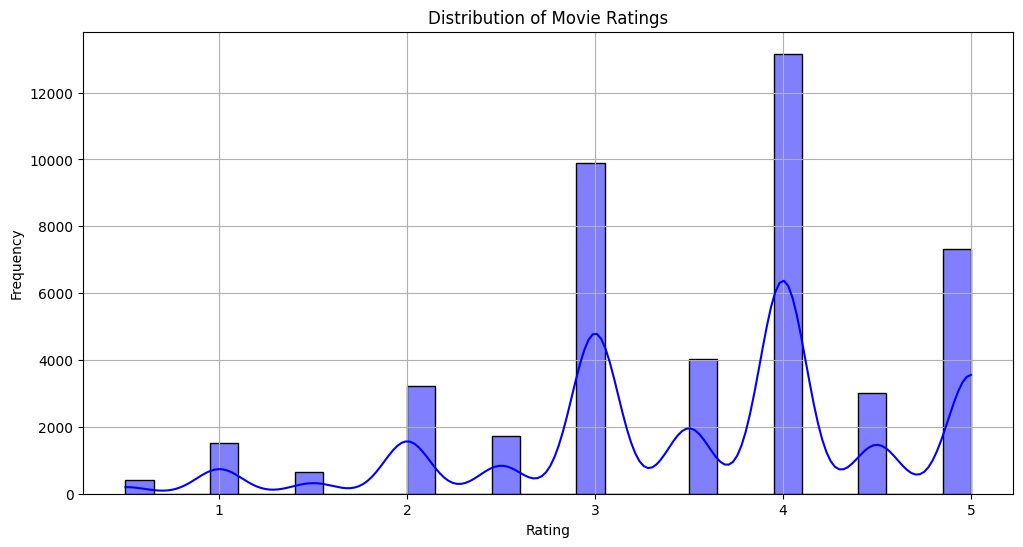

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(ratings['rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Number of Ratings per Movie

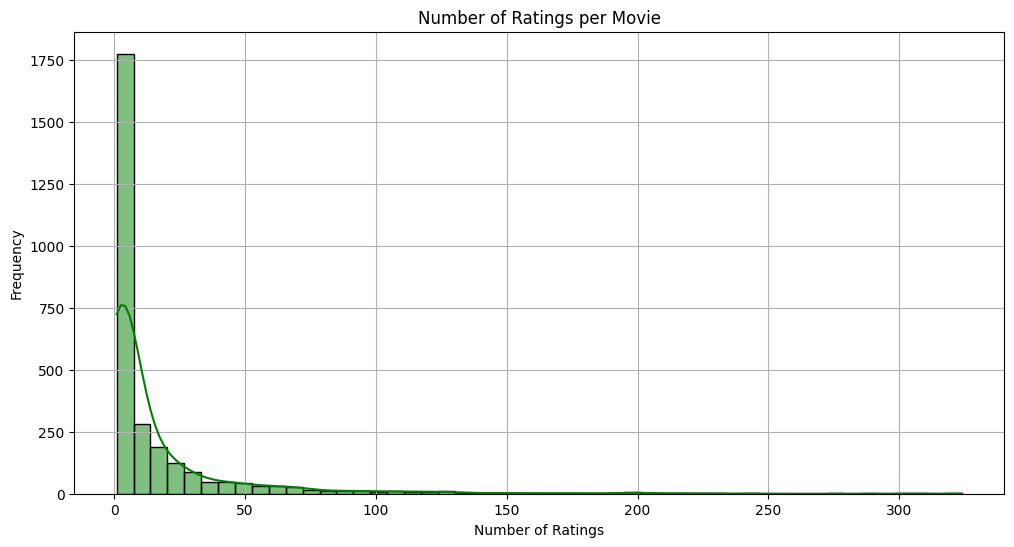

In [12]:
plt.figure(figsize=(12, 6))
ratings_per_movie = ratings.groupby('movieid').count()['rating']
sns.histplot(ratings_per_movie, bins=50, kde=True, color='green')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Top 10 Movies with Most Ratings

<ipython-input-13-daef9f1b61c5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='title', data=top_movies, palette='viridis')


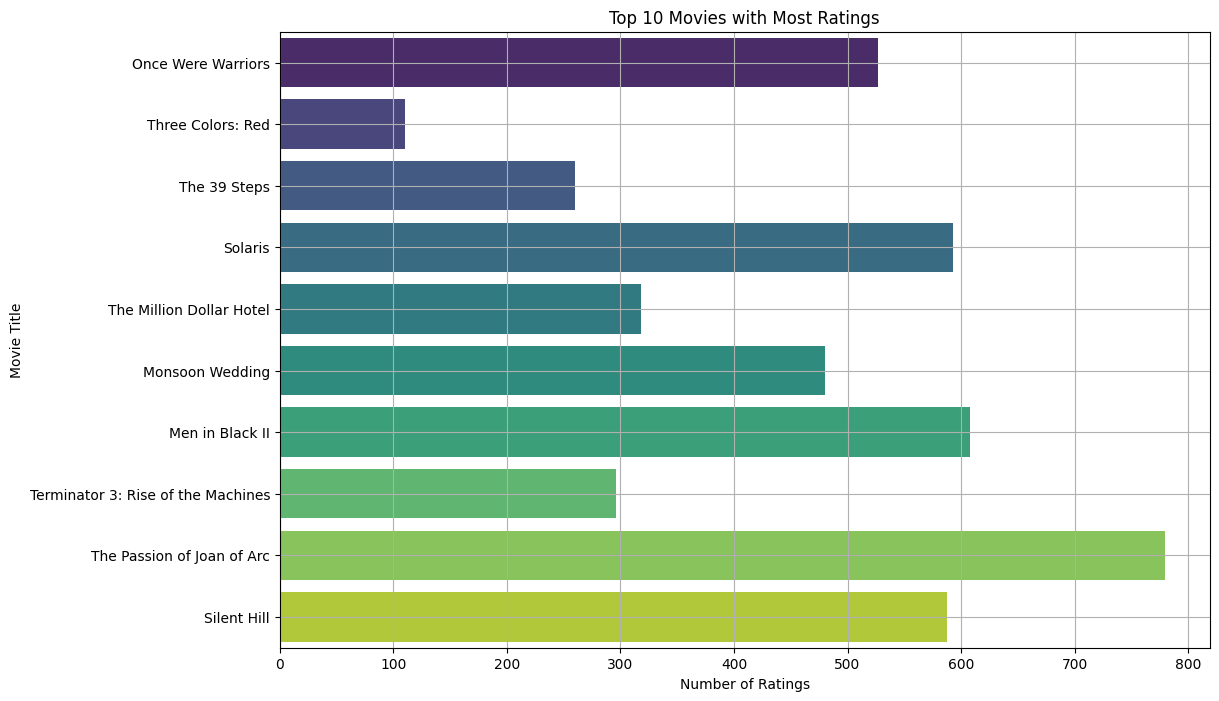

In [13]:
top_rated_movies = ratings_per_movie.sort_values(ascending=False).head(10)
top_movies = movies[movies['id'].isin(top_rated_movies.index)]
plt.figure(figsize=(12, 8))
sns.barplot(x='id', y='title', data=top_movies, palette='viridis')
plt.title('Top 10 Movies with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.grid(True)
plt.show()


Average Ratings per Movie

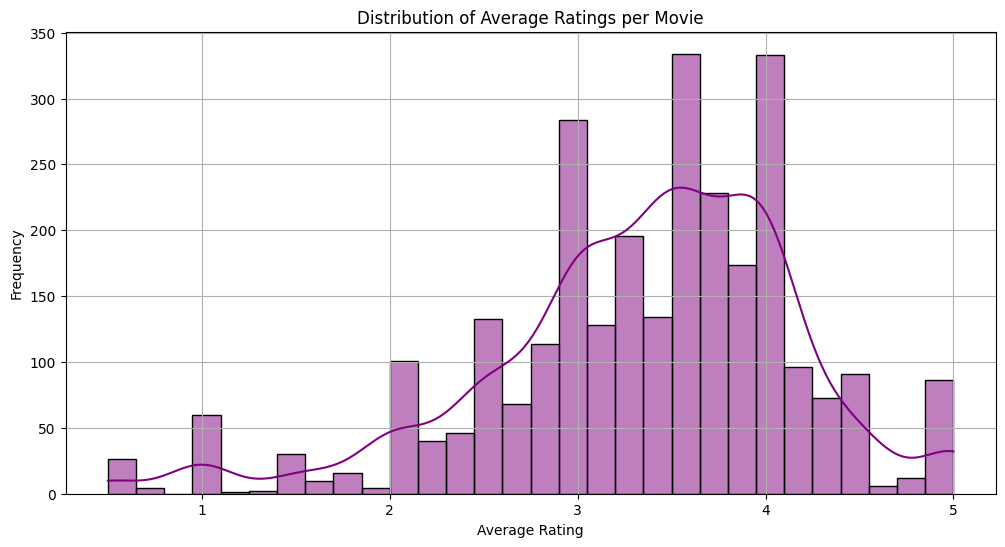

In [14]:
average_ratings = ratings.groupby('movieid').mean()['rating']
plt.figure(figsize=(12, 6))
sns.histplot(average_ratings, bins=30, kde=True, color='purple')
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Genre Popularity by Movie Count

<ipython-input-15-893b505339c8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_count, palette='rocket')


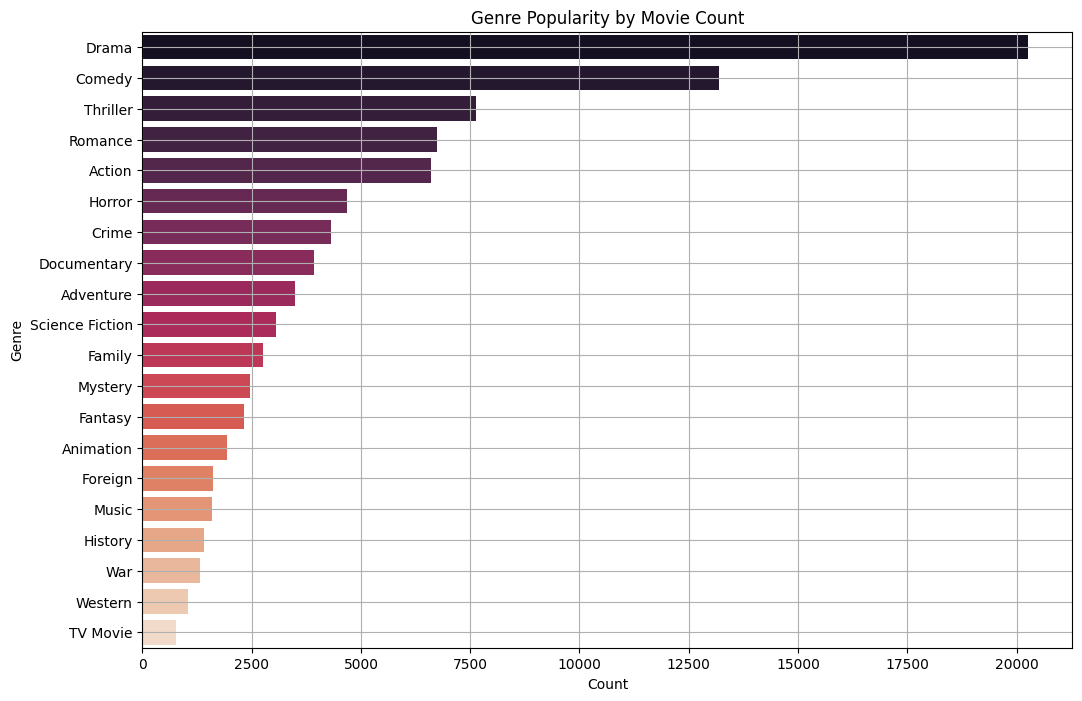

In [15]:
import ast # Import the ast module

# Extract genres and count
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genre_count = pd.DataFrame(movies['genres'].explode().value_counts().reset_index())
genre_count.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_count, palette='rocket')
plt.title('Genre Popularity by Movie Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

Distribution of Movie Lengths

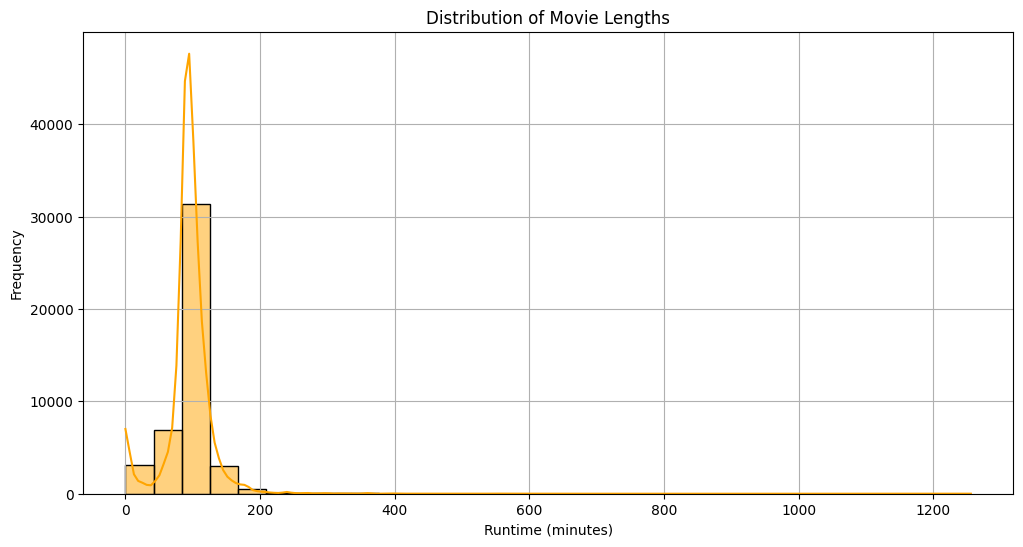

In [16]:
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')
plt.figure(figsize=(12, 6))
sns.histplot(movies['runtime'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Movie Lengths')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Word Cloud of Keywords

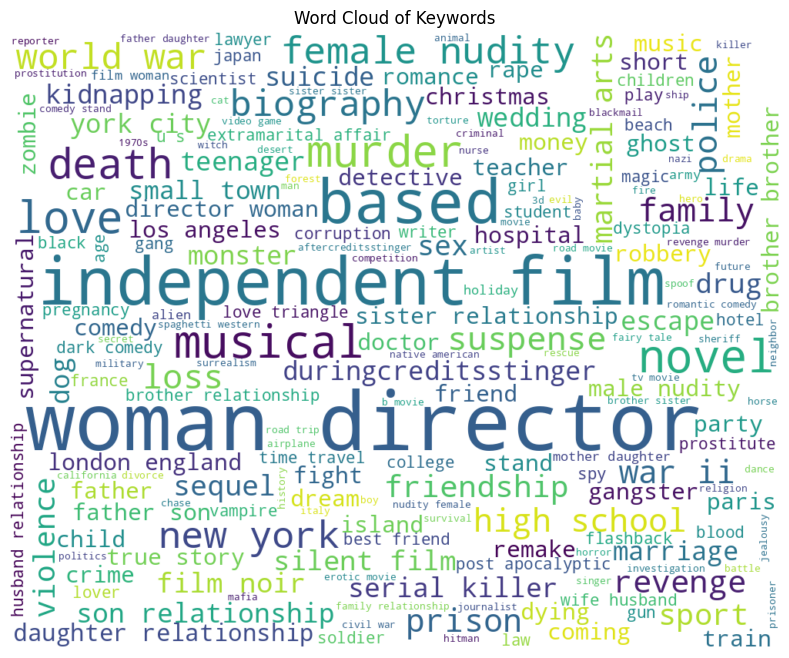

In [17]:
from wordcloud import WordCloud
import ast

# Combine all keywords into one large string
all_keywords = ' '.join(keywords['keywords'].apply(lambda x: ' '.join([d['name'] for d in ast.literal_eval(x)]))) # Extract the 'name' values from the dictionaries

# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=1000, height=800, background_color='white').generate(all_keywords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords')
plt.show()

Correlation Heatmap between Features

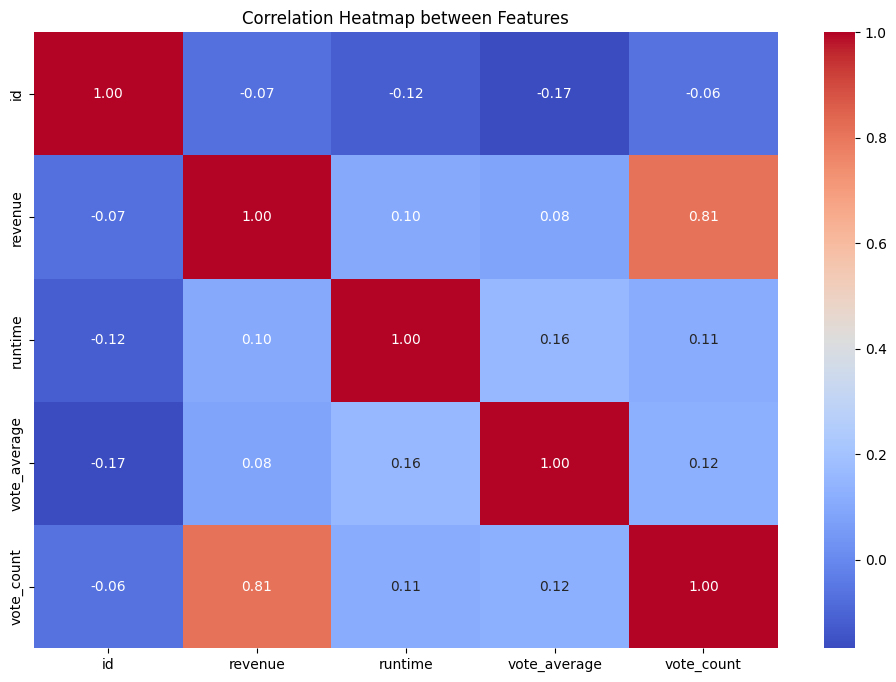

In [18]:
# Selecting numeric columns for correlation analysis
numeric_features = movies.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Features')
plt.show()


Movie Ratings by Year

In [19]:
# Extract release year and plot
movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year
ratings_by_year = ratings.merge(movies[['id', 'release_year']], left_on='movieid', right_on='id')
average_rating_by_year = ratings_by_year.groupby('release_year')['rating'].mean()




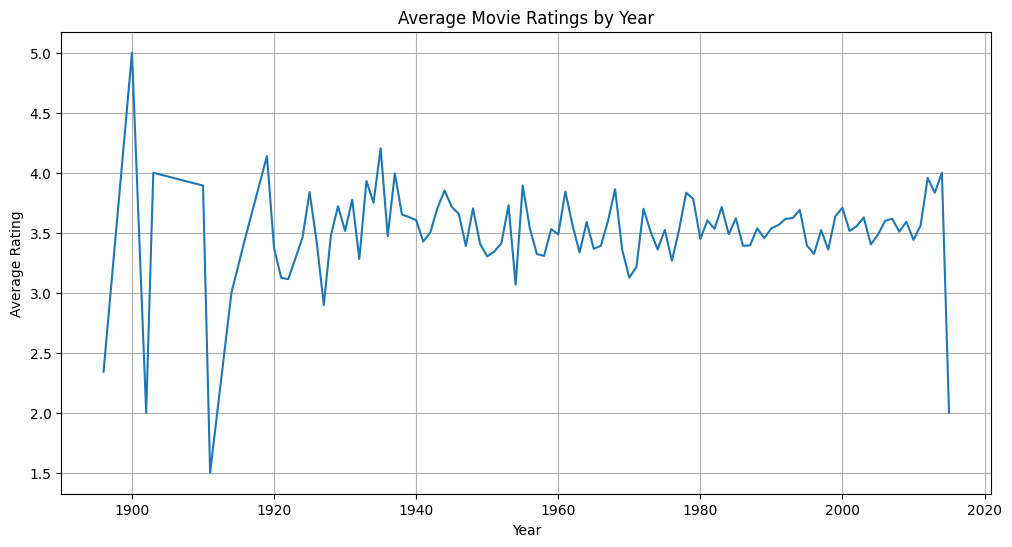

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_rating_by_year.index, y=average_rating_by_year.values)
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

Number of Movies Released Per Year

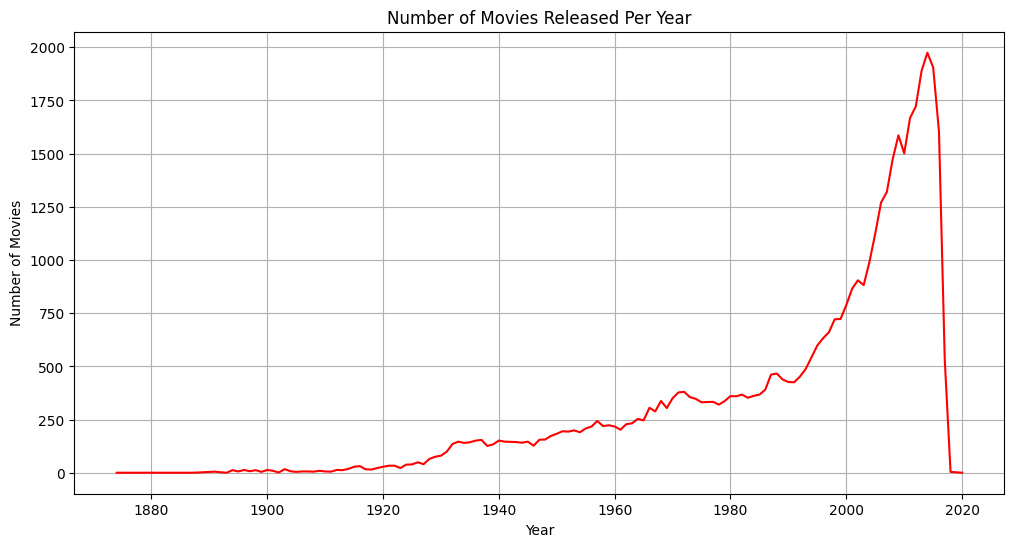

In [21]:
movies_by_year = movies['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_by_year.index, y=movies_by_year.values, color='red')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


 Building and Enhancing the Recommender System

In [22]:
# Load the data into Surprise format
!pip install scikit-surprise
from surprise import Reader, Dataset


  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357271 sha256=ae1b8996291e4db52f3e8b0d365615a8364c1185895ecc9d46021376cd8e6f99
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [23]:
# Load the data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userid', 'movieid', 'rating']], reader)


In [24]:
# Load the data into Surprise format
!pip install scikit-surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate



svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9060  0.8926  0.8981  0.8981  0.9000  0.8990  0.0043  
MAE (testset)     0.6961  0.6863  0.6946  0.6897  0.6920  0.6917  0.0035  
Fit time          1.19    1.47    1.03    2.01    2.45    1.63    0.53    
Test time         0.12    0.15    0.09    0.23    0.10    0.14    0.05    


{'test_rmse': array([0.9059977 , 0.89258854, 0.89808031, 0.89814404, 0.90003379]),
 'test_mae': array([0.69608782, 0.68626675, 0.69462365, 0.68973053, 0.69197531]),
 'fit_time': (1.1928575038909912,
  1.4706814289093018,
  1.029534101486206,
  2.0146005153656006,
  2.452455759048462),
 'test_time': (0.12157106399536133,
  0.1450181007385254,
  0.08562874794006348,
  0.22562384605407715,
  0.0986940860748291)}

In [25]:
# Train the model
trainset = data.build_full_trainset()
svd.fit(trainset)

Hybrid Recommender System: Combining Collaborative and Content-Based Filtering


Import Necessary Libraries

In [26]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [27]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

In [28]:
# Load dataset
ratings = pd.read_csv('ratings_small.csv')
movies = pd.read_csv('movies_metadata.csv', low_memory=False)

In [29]:

movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

In [30]:

ratings = ratings[ratings['movieId'].isin(movies['id'])]


In [31]:
# Prepare data for Surprise library
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [32]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Train SVD model
svd = SVD()
svd.fit(trainset)

Predict the Rating

In [33]:
# Predict the rating for a specific user and movie
user_id = 1
movie_id = 10
rating_prediction = svd.predict(user_id, movie_id)
print(f"Predicted rating for user {user_id} and movie {movie_id}: {rating_prediction.est}")


Predicted rating for user 1 and movie 10: 3.1427483908709126


Function to Recommend Top N Movies for a Given User

In [34]:
# Function to recommend top N movies for a given user
def recommend_movies(user_id, num_recommendations=10):
    movie_ids = movies['id'].dropna().unique()
    movie_ratings = [svd.predict(user_id, movie_id).est for movie_id in movie_ids]
    recommendations = pd.DataFrame({
        'movieid': movie_ids,
        'predicted_rating': movie_ratings
    })
    recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)
    top_recommendations = recommendations.head(num_recommendations)
    top_recommendations = pd.merge(top_recommendations, movies[['id', 'title']], left_on='movieid', right_on='id')
    return top_recommendations[['title', 'predicted_rating']]


In [35]:
# Recommend top 10 movies for user with ID 1
recommendations = recommend_movies(1, 10)
print(recommendations)


                     title  predicted_rating
0     Sleepless in Seattle          4.199902
1  The Talented Mr. Ripley          4.186452
2  The Thomas Crown Affair          4.093595
3        The Sicilian Clan          4.006827
4          Murder She Said          4.003756
5             Galaxy Quest          3.995951
6       Once Were Warriors          3.992668
7              5 Card Stud          3.991420
8                 Dead Man          3.987657
9           The Good Thief          3.973391


Plotting Predicted Ratings for a Given User


In [36]:
import matplotlib.pyplot as plt


In [37]:
# Function to plot the predicted ratings for a user
def plot_predicted_ratings(user_id):
    movie_ids = movies['id'].dropna().unique()
    movie_ratings = [svd.predict(user_id, movie_id).est for movie_id in movie_ids]

    # Create a DataFrame for plotting
    ratings_df = pd.DataFrame({
        'movie_id': movie_ids,
        'predicted_rating': movie_ratings
    }).sort_values(by='predicted_rating', ascending=False)

Create the Streamlit App

In [38]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


Create the Streamlit App:

In [39]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split


In [40]:
movies = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings_small.csv')
keywords = pd.read_csv('keywords.csv')

In [41]:
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')
ratings['movieId'] = pd.to_numeric(ratings['movieId'], errors='coerce')


In [42]:
# Drop any rows with missing 'id' or 'movieId'
movies = movies.dropna(subset=['id'])
ratings = ratings.dropna(subset=['movieId'])

In [43]:

movies['id'] = movies['id'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)


In [44]:

movies = pd.merge(movies, keywords, left_on='id', right_on='id', how='left')


In [45]:
# Prepare data for Surprise model
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

In [46]:
# Train SVD model
svd = SVD()
svd.fit(trainset)


In [47]:
# Streamlit app
st.title("Cinematic Genius: Movie Recommender system")


2024-08-29 16:32:29.871 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.673 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-29 16:32:30.683 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [48]:
# Sidebar input for user ID
user_id = st.sidebar.number_input("Enter User ID", min_value=1, value=1, step=1)
num_recommendations = st.sidebar.number_input("Number of Recommendations", min_value=1, value=10, step=1)


2024-08-29 16:32:30.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.724 Session state does not function when running a script without `streamlit run`
2024-08-29 16:32:30.726 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32

In [49]:
# Function to recommend top N movies for a given user
def recommend_movies(user_id, num_recommendations=10):
    movie_ids = movies['id'].unique()
    movie_ratings = [svd.predict(user_id, movie_id).est for movie_id in movie_ids]
    recommendations = pd.DataFrame({
        'movieid': movie_ids,
        'predicted_rating': movie_ratings
    })
    recommendations = recommendations.sort_values(by='predicted_rating', ascending=False)
    top_recommendations = recommendations.head(num_recommendations)
    top_recommendations = pd.merge(top_recommendations, movies[['id', 'title']], left_on='movieid', right_on='id')
    return top_recommendations

In [50]:
# Function to plot the predicted ratings for a user
def plot_predicted_ratings(user_id, top_recommendations):
    plt.figure(figsize=(10, 6))
    plt.barh(top_recommendations['title'], top_recommendations['predicted_rating'], color='skyblue')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Movie Title')
    plt.title(f'Top {num_recommendations} Predicted Ratings for User {user_id}')
    plt.gca().invert_yaxis()
    st.pyplot(plt)

In [51]:

if st.sidebar.button("Get Recommendations"):
    recommendations = recommend_movies(user_id, num_recommendations)
    st.write(f"Top {num_recommendations} movie recommendations for User {user_id}:")
    st.dataframe(recommendations[['title', 'predicted_rating']])
    plot_predicted_ratings(user_id, recommendations)

2024-08-29 16:32:30.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.832 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 16:32:30.843 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [52]:
import pickle

In [53]:
import pickle

# Assuming 'movies' is the DataFrame you want to pickle
pickle.dump(movies, open('movies.pkl','wb'))

In [58]:
import pandas as pd

df = pd.read_csv('movies_metadata.csv')
# Access the 'id' column
movie_ids = df['id']

<ipython-input-58-b9ee8d26e372>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('movies_metadata.csv')


In [56]:

import pickle

pickle.dump(movie_ids.to_dict(), open('movie_dict.pkl', 'wb'))

In [63]:
import pandas as pd
import pickle


with open('movie_dict.pkl', 'rb') as f:
    movie_dict = pickle.load(f)

# Convert the 'id' column of the DataFrame to a list
movies_list = [{'id': value} for value in movie_dict['id'].tolist()]
movies_df = pd.DataFrame(movies_list)

print(movies_df.columns)
print(movies_df.head())

movies_df.to_pickle('/content/movie_dict.pkl')

Index(['id'], dtype='object')
      id
0    862
1   8844
2  15602
3  31357
4  11862


In [61]:
from google.colab import files
files.download('/content/movie_dict.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
import pandas as pd


metadata_df = pd.read_csv('movies_metadata.csv')


movies_df = pd.read_pickle('/content/movie_dict.pkl')


movies_df = movies_df.merge(metadata_df[['id', 'original_title']], on='id', how='left')


print(movies_df['original_title'])


movies_df.to_pickle('/content/movie_dict_with_titles.pkl')

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45523                        رگ خواب
45524            Siglo ng Pagluluwal
45525                       Betrayal
45526            Satana likuyushchiy
45527                       Queerama
Name: original_title, Length: 45528, dtype: object


<ipython-input-64-085c37ba32a1>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv('movies_metadata.csv')


In [65]:
import pickle
import numpy as np

similarity = np.array([[1, 0.5], [0.5, 1]])

pickle.dump(similarity, open('similarity.pkl', 'wb'))